<a id='introduction'></a>
# Project: Investigate a Dataset - Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <a href='#introduction'>Introduction</a>

### Dataset Description 
Below is what to expect to find in this in the soccer dataset. I acquired this data from  [kaggle](https://www.kaggle.com/datasets/hugomathien/soccer).

Soccer dataset for data analysis:

- +25,000 matches
- +10,000 players 
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matcheAbout Dataset

This dataset is stored in a SQLite database.



### Questions for Analysis
>- **What is the age distribution of players?**
>- **What teams improved the most over time?**
>- **What team attributes lead to the most victories?**


In [1]:
# I am importing all the packages I will need

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## <a href='#introduction'>Data Wrangling</a>

I am using sqlite3 package to connect to the sqlite soccer database

In [2]:
conn = sqlite3.connect('database.sqlite')

In [3]:
cur = conn.cursor()

I am looking to see what are the available tables and their names

In [4]:
table_names = cur.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()
for i,table in enumerate(table_names):
    print(i,table[0])

0 sqlite_sequence
1 Player_Attributes
2 Player
3 Match
4 League
5 Country
6 Team
7 Team_Attributes


**In the following cells I read in the data from the sqlite database into pandas dataframes for easy exploration and analysis**

### Player Attributes

As a non soccer fan I find I am lost trying to understand the player attriibutes.

I set out to the internet to find clarity and I found discription of these attributes [here](https://www.guidetofm.com/players/attributes/)

In [5]:
ply_attr = pd.read_sql(f'SELECT * FROM player_attributes', conn)

In [6]:
ply_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
ply_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
ply_attr.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### Players

In [9]:
players = pd.read_sql(f'SELECT * FROM player', conn)

In [10]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [11]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


I am looking to see if there are duplicated rows and remove them

In [12]:
sum(players.duplicated())

0

I am converting the players dataframe datatypes to appropriate types

- `birthday` to `datatime`
- `weight` to `float`

In [13]:
players.birthday = pd.to_datetime(players.birthday)

In [14]:
players.weight = players.weight.astype(float)

In [15]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 605.0+ KB


In [16]:
players.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


### Matches

In [17]:
matches = pd.read_sql(f"SELECT * FROM match", conn)

In [18]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [19]:
matches['date'] = pd.to_datetime(matches['date'])

I am looking to see the datatypes of the matches dataframe

In [20]:
matches.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Dtype         
---   ------            -----         
 0    id                int64         
 1    country_id        int64         
 2    league_id         int64         
 3    season            object        
 4    stage             int64         
 5    date              datetime64[ns]
 6    match_api_id      int64         
 7    home_team_api_id  int64         
 8    away_team_api_id  int64         
 9    home_team_goal    int64         
 10   away_team_goal    int64         
 11   home_player_X1    float64       
 12   home_player_X2    float64       
 13   home_player_X3    float64       
 14   home_player_X4    float64       
 15   home_player_X5    float64       
 16   home_player_X6    float64       
 17   home_player_X7    float64       
 18   home_player_X8    float64       
 19   home_player_X9    float64       
 20   home_player_X10   float64 

In [21]:
sum(matches.duplicated())

0

below I will clean the matches data in these columns `goal, shoton, shotoff, foulcommit, card, cross, corner, possession`. The data is in the form of markdown format.

I will import the `BeautifulSoup` library so I can easily read the html structure

In [22]:
from bs4 import BeautifulSoup as bs

In [23]:
columns = ['match_api_id','goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']

The cell below selects only the rows that are not `null` or `None`

In [24]:
html_format_matches_data = matches[columns][np.invert(matches[columns].isnull().any(axis=1))]

The functions below extracts information from the xml in columns and creates a new data frame of that column.

The new data frame will have the match id and desired clean data

In [25]:
def clean_html(dataframe, column_name):
    dataframe_subset = dataframe[['match_api_id',f'{column_name}']]
    
    if column_name=='goal':
        find = 'goals'
        
    elif column_name=='shoton':
        find = 'shoton'
        
    elif column_name=='shotoff':
        find = 'shotoff'
        
    elif column_name=='foulcommit':
        find = 'foulscommitted'
        
    elif column_name=='cross':
        find = 'crosses'
        
    elif column_name=='corner':
        find = 'corners'
        
    else:
        find='ycards'
   
    
    clean_arr = []
    for match_id, dirty_column in dataframe_subset.values:
        bs_content = bs(dirty_column, 'html.parser')
        
        for xml in bs_content.find_all('value'):
            try:
                player_id = xml.find('player1').get_text()
                team_id = xml.find('team').get_text()
                data = xml.find(find).get_text()
            except Exception:
                continue
            clean_arr.append([match_id, player_id, team_id, data])
            
    return pd.DataFrame(
        np.array(clean_arr), 
        columns=['match_api_id',f'player_api_id_{column_name}',f'team_api_id_{column_name}',f'{column_name}']
    )

The below cells are extracting the data from the xml format.
<br>
The `clean_html` function extracts the matchID,playerID, teamID and the desired data then it produces and `:pandas: DataFrame` 
<br>
The data from these dataframes can easily be analysed and or joined together

In [26]:
goals_df = clean_html(html_format_matches_data, 'goal')

In [27]:
shoton_df = clean_html(html_format_matches_data, 'shoton')

In [28]:
cross_df = clean_html(html_format_matches_data, 'cross')

### **removing duplicates**

#### <center>Goals</center>

In [29]:
sum(goals_df.duplicated())

3657

In [30]:
goals_df.drop_duplicates(inplace=True)

In [31]:
goals_df = goals_df.astype(int)

#### <center>Shoton</center>

In [32]:
shoton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56659 entries, 0 to 56658
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_api_id          56659 non-null  object
 1   player_api_id_shoton  56659 non-null  object
 2   team_api_id_shoton    56659 non-null  object
 3   shoton                56659 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [33]:
sum(shoton_df.duplicated())

12121

In [34]:
shoton_df.drop_duplicates(inplace=True)

In [35]:
sum(shoton_df.duplicated())

0

In [36]:
shoton_df = shoton_df.astype(int)

In [37]:
shoton_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44538 entries, 0 to 56658
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   match_api_id          44538 non-null  int64
 1   player_api_id_shoton  44538 non-null  int64
 2   team_api_id_shoton    44538 non-null  int64
 3   shoton                44538 non-null  int64
dtypes: int64(4)
memory usage: 1.7 MB


#### <center>Cross</center>

In [38]:
sum(cross_df.duplicated())

130996

In [39]:
cross_df.drop_duplicates(inplace=True)

In [40]:
sum(cross_df.duplicated())

0

In [41]:
cross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100108 entries, 0 to 231100
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   match_api_id         100108 non-null  object
 1   player_api_id_cross  100108 non-null  object
 2   team_api_id_cross    100108 non-null  object
 3   cross                100108 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [42]:
cross_df = cross_df.astype(int)

In [43]:
cross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100108 entries, 0 to 231100
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   match_api_id         100108 non-null  int64
 1   player_api_id_cross  100108 non-null  int64
 2   team_api_id_cross    100108 non-null  int64
 3   cross                100108 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB


I will drop the columns I have extracted information from the `matches` dataframe

In [44]:
matches.drop(columns[1:], axis=1, inplace=True)

### League

In [45]:
league = pd.read_sql(f'SELECT * FROM league', conn)

In [46]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [47]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


### Countries

In [48]:
country = pd.read_sql(f'SELECT * FROM country',conn)

In [49]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [50]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


### Teams

In [51]:
teams = pd.read_sql(f'SELECT * FROM team', conn)

In [52]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [53]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### Team Attributes

In [54]:
team_attr = pd.read_sql(f'SELECT * FROM team_attributes', conn)

In [55]:
team_attr.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [56]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

The column `buildUpPlayDribbline` has about ~70% of missing data and because of this I will drop it in the cell below

In [57]:
team_attr.drop('buildUpPlayDribbling', axis=1, inplace=True)

In [58]:
team_attr['date'] = pd.to_datetime(team_attr['date'])

In [59]:
489/1458 * 100

33.53909465020576

In [60]:
team_attr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


<a id='eda'></a>
## <a href='#introduction'>Exploratory data analysis</a>

### What is the age distribution of players?
I will look a the age of the players per season

In the following cells, I am going to build a dataframe with the `season, date and player_id`.
<br>
I am going to put all the player's ids into one column with the date and season being a unique identifier

In [61]:
# selecting player id columns
player_ids = [
    'home_player_1', 'home_player_2',
   'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
   'home_player_7', 'home_player_8', 'home_player_9',
   'home_player_10', 'home_player_11', 'away_player_1',
   'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
   'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
   'away_player_10', 'away_player_11']

In [62]:
match_time_features = ['league_id','season','date'] # selecting season and date columns

The below cell removes all the rows with `null` values

In [63]:
match_players = matches[match_time_features+player_ids][np.invert(matches[player_ids].isnull().any(axis=1))]

The function below selects every the player ids and stack them on top of each other to create a dataframe of such a form `season, date, player_api_id`

In [64]:
def stack_player_ids(df, match_time_features, player_ids):
    to_concat = []
    for player_id in player_ids:
        to_concat.append(df[match_time_features+[player_id]].rename(columns={player_id:'player_api_id'}))
        
    return pd.concat(to_concat, ignore_index=True)

In [65]:
players_in_season = stack_player_ids(match_players, match_time_features,player_ids)

In [66]:
players_in_season.head(3)

,league_id,season,date,player_api_id
0,1,2008/2009,2009-02-27,38327.0
1,1,2008/2009,2009-03-08,36835.0
2,1,2008/2009,2009-03-07,34480.0


In [67]:
players_in_season.player_api_id = players_in_season.player_api_id.astype(int)
players_in_season.date = pd.to_datetime(players_in_season.date)

In [68]:
players_in_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470228 entries, 0 to 470227
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   league_id      470228 non-null  int64         
 1   season         470228 non-null  object        
 2   date           470228 non-null  datetime64[ns]
 3   player_api_id  470228 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 14.4+ MB


In [69]:
sum(players_in_season.duplicated())

7

In [70]:
players_in_season.drop_duplicates(inplace=True)

In [71]:
sum(players_in_season.duplicated())

0

To be able to get the ages of the players I merge `players` and `players_per_season` dataframes.

When the tables are merged I will have the date of the game play and the date of birth of the players, which I can use to determine the age of the players

In [72]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 605.0+ KB


In [73]:
players_per_season = players.merge(players_in_season, on='player_api_id')

In [74]:
players_per_season.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,league_id,season,date
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-03-08
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-04-11
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187.0,17642,2014/2015,2015-04-26


In [75]:
players_per_season['player_age'] = ((players_per_season.date-players_per_season.birthday)/np.timedelta64(1, 'Y')).astype(int)

The above cell computes the age of the player

In [76]:
age_distribution_per_seaon = players_per_season.groupby(['season','player_api_id']).mean()

The cell above computes the ages of players and groups them by season

<a id='age'></a>

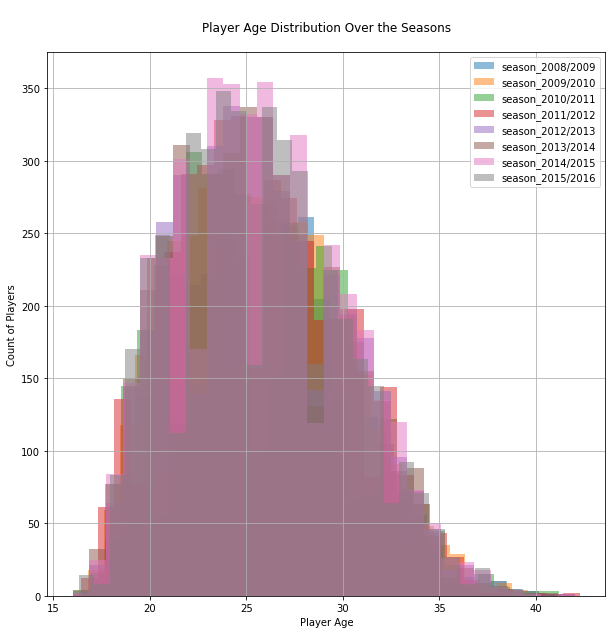

In [77]:
for season in age_distribution_per_seaon.index.levels[0]:
    age_distribution_per_seaon.loc[season].player_age.hist(alpha=0.5, figsize=(10,10), label=f'season_{season}', bins=30)
    
plt.title('\nPlayer Age Distribution Over the Seasons\n')
plt.xlabel('Player Age')
plt.ylabel('Count of Players')
plt.legend();

### What teams improved the most over time?

I will look at improvement as the number victories a team has acquired over time.

In [78]:
team_improvement_df = matches[['country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal']].copy()

In [79]:
team_improvement_df.head(3)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [80]:
def win_lose(arr1,arr2):
    """Determines team1's victory"""
    team1_goal = arr1
    team2_goal = arr2

    if team1_goal-team2_goal>0:
        return 1
    
    else:
        return 0
    

In [81]:
team_improvement_df['home_team_win'] = team_improvement_df[['home_team_goal','away_team_goal']].apply(lambda arr : win_lose(arr.home_team_goal,arr.away_team_goal), axis=1)
team_improvement_df['away_team_win'] = team_improvement_df[['home_team_goal','away_team_goal']].apply(lambda arr : win_lose(arr.away_team_goal,arr.home_team_goal), axis=1)

In [82]:
team_improvement_df.head(3)

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_win,away_team_win
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,0,0
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,0
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,0,1


The above cells create two new columns that have the wins or loses of a team. I will then add all the wins a team has had per season and then compare to latest season I have in the database, the teams with the biggest change will the most improved teams. I will look at 5 teams

In [83]:
constant_columns = ['season','date','match_api_id']
columns_to_stack = [['home_team_api_id','home_team_win'],['away_team_api_id','away_team_win']]

def get_team_victories(df):
    home_df = df[constant_columns].copy()
    home_df[['team_api_id','team_win']] = df[columns_to_stack[0]]
            
    away_df = df[constant_columns].copy()
    away_df[['team_api_id','team_win']] = df[columns_to_stack[1]]
            
    return pd.concat([home_df,away_df])

In [84]:
team_wins = get_team_victories(team_improvement_df)

In [85]:
team_wins.head(3)

,season,date,match_api_id,team_api_id,team_win
0,2008/2009,2008-08-17,492473,9987,0
1,2008/2009,2008-08-16,492474,10000,0
2,2008/2009,2008-08-16,492475,9984,0


 The above cells have created a new data frame which has a column that shows either a team won or did not win.
 </br>
 - `0`: this means that a team did not win so it could either be a lose or a draw
 - `1`: this means that a team won the match

In [86]:
team_wins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51958 entries, 0 to 25978
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season        51958 non-null  object        
 1   date          51958 non-null  datetime64[ns]
 2   match_api_id  51958 non-null  int64         
 3   team_api_id   51958 non-null  int64         
 4   team_win      51958 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.4+ MB


In [87]:
season_08_09 = team_wins.groupby(['season','team_api_id']).sum().loc['2008/2009'].drop('match_api_id', axis=1)
season_15_16 = team_wins.groupby(['season','team_api_id']).sum().loc['2015/2016'].drop('match_api_id', axis=1)

The above cell looks at first season available in the dataset and also the latest season available in the dataset.
- `season_08_09` is dataframe that represents the 2008/2009 season
- `season_15_16` is dataframe that represents the 2015/2016 season

I will then use the two dataframes to get the number of victory difference between 2008/2009 season and 2015/2016 season

In [88]:
victory_diff = season_08_09.merge(season_15_16,left_index=True, right_index=True)


In [89]:
victory_diff.rename(columns={'team_win_x':'team_win_2008/2009','team_win_y':'team_win_2015/2016'}, inplace=True)

In [90]:
victory_diff.head(3)

,team_win_2008/2009,team_win_2015/2016
team_api_id,,
1601,9,11
1957,9,10
2182,16,13


In [91]:
sum(victory_diff.duplicated())

16

In [92]:
victory_diff.drop_duplicates(inplace=True)

In [93]:
sum(victory_diff.duplicated())

0

In [94]:
victory_diff['victory_difference'] = victory_diff['team_win_2015/2016']-victory_diff['team_win_2008/2009'] 

The above cell computes the difference between 2008/2009 victories with 2015/2016.

I will then pick the five teams to have improved the most by looking at those with the highest difference

In [95]:
five_improved_teams = victory_diff.sort_values('victory_difference', ascending=False)[:5]

In [96]:
five_improved_teams.head(3)

,team_win_2008/2009,team_win_2015/2016,victory_difference
team_api_id,,,
9875,12,25,13
9772,17,29,12
9847,19,30,11


In [97]:
five_improved_teams_with_names = five_improved_teams.merge(
    teams[['team_api_id','team_short_name']],
    on='team_api_id')\
    [['team_win_2008/2009','team_win_2015/2016','victory_difference','team_short_name']]

The above cell merges the five most improved teams dataframe with the teams dataframe, so that I can extract the team names.

I use the new dataframe below to make a plot that shows the improvement
<a id='improved'></a>

In [98]:
five_improved_teams_with_names.rename(index=lambda x:five_improved_teams_with_names['team_short_name'].values[x], inplace=True)

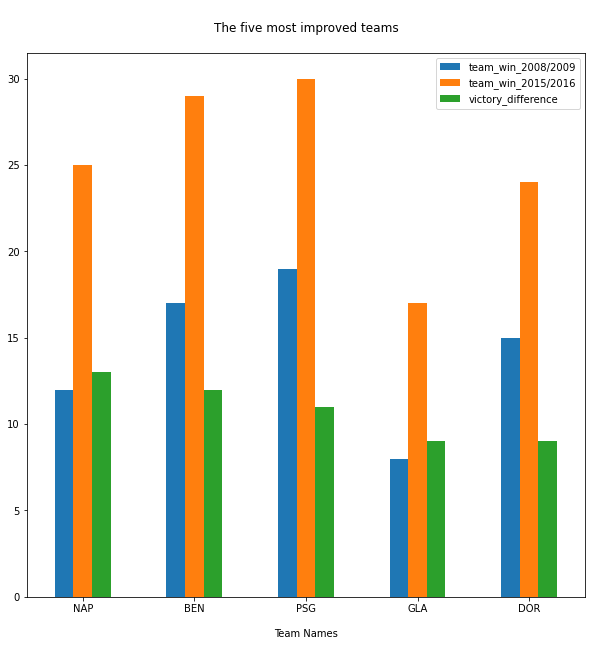

In [99]:
five_improved_teams_with_names.plot.bar(rot=0, figsize=(10,10))
plt.title('\nThe five most improved teams\n')
plt.xlabel('\nTeam Names\n');

### What team attributes lead to the most victories?

I am creating a new dataframe with dropped `object` types so that I can only analyse numerical datatypes

In [100]:
new_team_attr = team_attr.drop(team_attr.columns.values[team_attr.dtypes=='object'], axis=1)

In [101]:
new_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1458 non-null   int64         
 1   team_fifa_api_id        1458 non-null   int64         
 2   team_api_id             1458 non-null   int64         
 3   date                    1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed        1458 non-null   int64         
 5   buildUpPlayPassing      1458 non-null   int64         
 6   chanceCreationPassing   1458 non-null   int64         
 7   chanceCreationCrossing  1458 non-null   int64         
 8   chanceCreationShooting  1458 non-null   int64         
 9   defencePressure         1458 non-null   int64         
 10  defenceAggression       1458 non-null   int64         
 11  defenceTeamWidth        1458 non-null   int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 13

Below I will merge the team attributes and the team_wins dataframe. I will then create a series with the total number of victories a team has and a dataframe with team attributes

In [102]:
wins = new_team_attr.merge(
    team_wins[['season','date','team_api_id','team_win']], on=['team_api_id',
                                                               #'date'
                                                              ]
).groupby(['team_api_id']).sum()['team_win']



attributes = new_team_attr.merge(
    team_wins[['season','date','team_api_id','team_win']], on=['team_api_id',
                                                               #'date'
                                                              ]
).groupby(['team_api_id']).mean().drop('team_win', axis=1)


In [103]:
attributes['team_win'] = wins.values

In [104]:
attributes.head(3)

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,team_win
team_api_id,,,,,,,,,,,
1601,1115.5,874.0,47.333333,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333,552
1773,942.0,100087.0,52.000000,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000,66
1957,621.5,110745.0,47.166667,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667,522


<a id='pairplot'></a>

In [105]:
X = ['buildUpPlaySpeed', 'buildUpPlayPassing',
       'chanceCreationPassing', 'chanceCreationCrossing',
       'chanceCreationShooting', 'defencePressure', 'defenceAggression',
       'defenceTeamWidth']

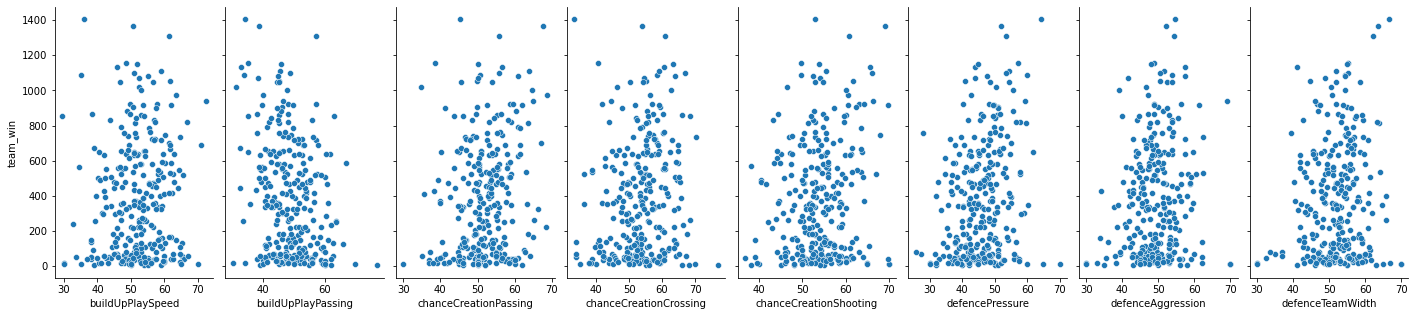

In [106]:
g=sns.pairplot(attributes, x_vars=X, y_vars='team_win')
g.fig.set_size_inches(20,5);

In [107]:
X.append('team_win')

The heatmap shows the correlation between the numerical attributes of a team 
<a id='heatmap'></a>

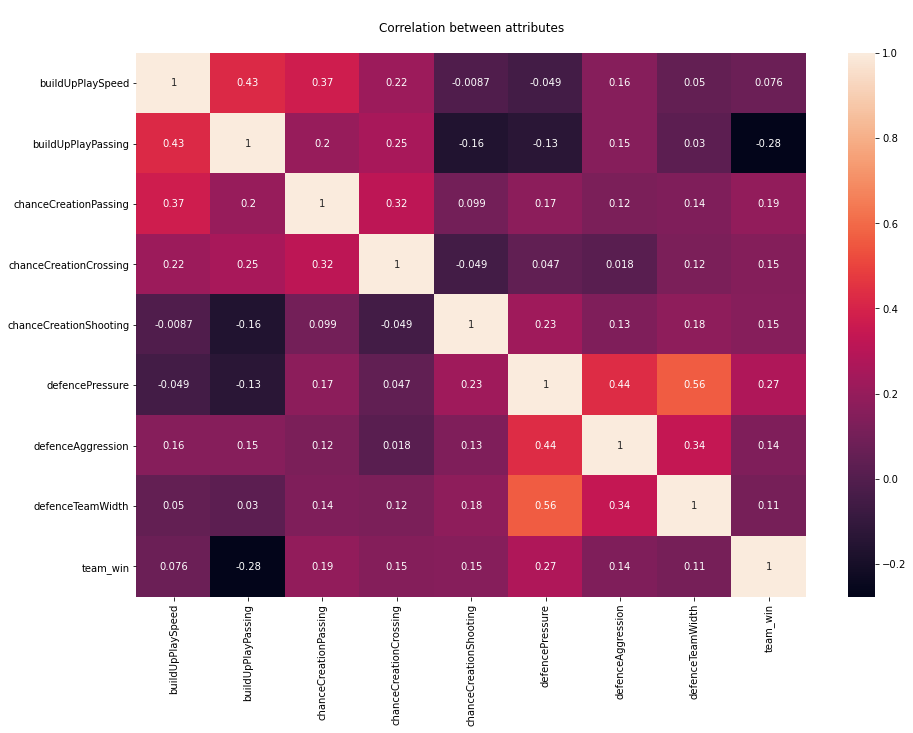

In [108]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(attributes[X].corr(), ax=ax, annot=True)
plt.title('\nCorrelation between attributes\n');

Below I am looking to see if there is a relation between the number of shotons a team has against the number of team victories

In [109]:
wins_by_shoton = shoton_df.\
    merge(team_wins, 
          left_on='team_api_id_shoton', 
          right_on='team_api_id').\
    groupby('team_api_id', as_index=False).\
    sum()

The scatter plot below shows the relationship between the number of shotons a team has vs the victories the teams has
<a id='shoton'></a>

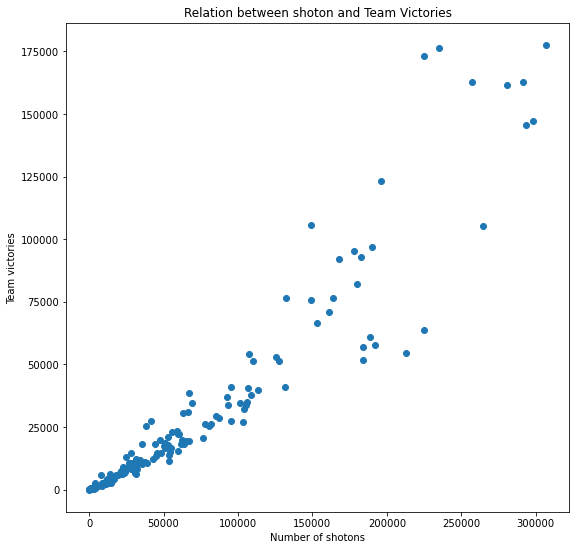

In [110]:
fig = plt.figure(figsize=(9,9))
plt.scatter(x=wins_by_shoton['shoton'], y=wins_by_shoton['team_win'])
plt.title('Relation between shoton and Team Victories')
plt.xlabel('Number of shotons')
plt.ylabel('Team victories');

In [111]:
wins_by_cross = cross_df.\
    merge(team_wins, 
          left_on='team_api_id_cross', 
          right_on='team_api_id').\
    groupby('team_api_id', as_index=False).\
    sum()

In [112]:
wins_by_cross.head(3)

,team_api_id,match_api_id_x,player_api_id_cross,team_api_id_cross,cross,match_api_id_y,team_win
0,1601,2474323680,155194560,3842400,2400,2837121270,920
1,1957,2969472960,339046560,5636160,2880,3403573584,1044
2,2182,4206670080,404496000,8902560,4080,4821744221,2108


The scatter plot below shows the relationship between the number of crosses a team has vs the victories the teams has
<a id='cross'></a>

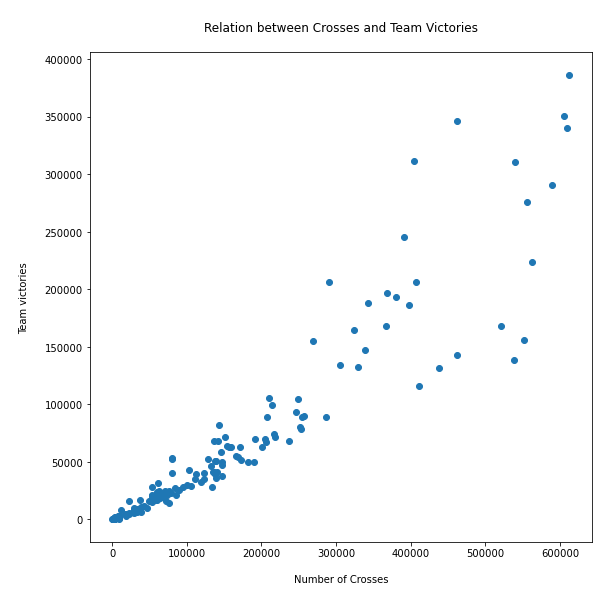

In [113]:
fig = plt.figure(figsize=(9,9))
plt.scatter(x=wins_by_cross['cross'], y=wins_by_cross['team_win'])
plt.title('\nRelation between Crosses and Team Victories\n')
plt.xlabel('\nNumber of Crosses\n')
plt.ylabel('\nTeam victories\n');

<a id='conclusion'></a>
# <a href='#introduction'>Conclusion</a>

I have set out to find answers to the following questions:
>- **What is the age distribution of players?**
>- **What teams improved the most over time?**
>- **What team attributes lead to the most victories?**

I looked at the distribution of age from all seasons and the distribution of the ages of players in the league is shown by this <a href="#age">figure</a>.<br>The majority of the players seem to be around their mid 20s. Players can be as old as 40 but the number of such players is very low.
<br>
I thought that some of the teams would improve over time, so I decided to look at teams that improved overtime by looking at the
<br>victories they had in the 2008 league and number of victories they had in the 2016 leagued. I showed the improvements in this 
<a href='#improved'>diagram</a>.
<br> The diagram shows the five most improved teams and the green bar in the diagram shows how many more victories the team has
<br>improved by since 2008.
<br>I wondered if there are any attributes that could affect team's victories so I looked at `team_win` vs the attributes. I made a <a href='#pairplot'>pairplot</a> and
<br>a <a href='#heatmap'>heatmap</a>. There is very little correlation between the victories and the attributes I have explored in the diagrams, I then looked at two<br>more attributes, the number of`shoton` and the number of `crosses`. These attributes do have a correlation with the number
<br>of victories a team has and that is shown in these figures: <a href='#shoton'>shoton figure</a> and <a href='#cross'>cross figure</a>. The correlation is positive with high occurrences
<br> of team wins correlating with high shotons and high crosses



One of the limitations in this analysis is that I did not use any statistical test and because of that I can only speak of correlations between variables but I am not sure whether there is causation or not.

# References
### N/A